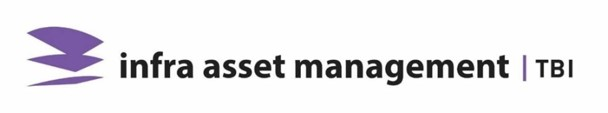

## Importeren van de benodigdheden

### Python packages 

In [1]:
import os
import json
import pandas as pd

from datetime import datetime

from metadata_storingsanalyse import MetadataStoringsAnalyse

### Working directory veranderen
Voor het actueel houden van de paden de resource documenten en/of data bestanden wordt de working directory van deze code veranderd zodat deze gelijk is aan de rootfolder van de github repository.

In [2]:
while 1:
    if os.getcwd().endswith('storingsanalyse-generator'):
        break 
    else:
        os.chdir('..')
        
print(f'New working directory = {os.getcwd()}')

New working directory = C:\Users\NBais\OneDrive - TBI Holding\Documenten\GitHub\storingsanalyse-generator


### Importeren van ondersteunende DataFrames

#### Description_df
Dit DataFrame bevat de namen van de SBS en LBS nummers.

In [3]:
#tabel inlezen
rel_path = f'res\\location_description_map.json'
with open(rel_path, 'r') as r:
    description_data = json.load(r)

# Df for the connection between the sbs/lbs numbers and their description
description_df = pd.DataFrame(description_data)

#### Metadata
Dit is een json met alle data van een project die niet verkregen kan worden door mideel van het bevragen van de Maximo database.

In [4]:
rel_path = 'src\\rapport generator\\metadata_file_coentunnel-tracé.json'
with open(rel_path, 'r') as mf:
    _metadata = json.load(mf)

In [5]:
_metadata

{'project': 'Coentunnel-tracÃ©',
 'start_datum': '01_2016',
 'contract_info': {'tijdsregistratie': 'True',
  'minimale_beschikbaarheid': 'xx',
  'minimale_responsetijd': '04:00:00'},
 'meldingen': {'01_2016': {'45': 6,
   '61': 5,
   '23': 1,
   '43': 4,
   '41': 3,
   '46B': 3,
   '46A': 1,
   '44': 2,
   '97': 1,
   '21': 1,
   '48': 1,
   '15': 6,
   '74': 2,
   '36': 2,
   '59': 1,
   '50': 5,
   '67': 1,
   '40': 1,
   '90': 1,
   '92': 1},
  '02_2016': {'45': 19,
   '61': 4,
   '23': 13,
   '63': 4,
   '43': 1,
   '41': 7,
   '0': 3,
   '46B': 1,
   '46A': 1,
   '44': 7,
   '24': 1,
   '97': 1,
   '71': 8,
   '15': 6,
   '64': 1,
   '50': 2,
   '75': 1,
   '12': 1},
  '03_2016': {'45': 10,
   '61': 8,
   '63': 2,
   '43': 12,
   '41': 1,
   '0': 4,
   '46B': 1,
   '46A': 7,
   '24': 2,
   '21': 1,
   '71': 1,
   '86': 1,
   '64': 2,
   '59': 1,
   '67': 1,
   '80': 1},
  '04_2016': {'45': 6,
   '61': 4,
   '63': 3,
   '43': 12,
   '41': 3,
   '46B': 1,
   '46A': 2,
   '44': 2,
  

In [6]:
metadata = pd.json_normalize(data=_metadata, max_level=0)
metadata

,project,start_datum,contract_info,meldingen,storingen
0,Coentunnel-tracÃ©,01_2016,"{'tijdsregistratie': 'True', 'minimale_beschik...","{'01_2016': {'45': 6, '61': 5, '23': 1, '43': ...","{'01_2016': {'61': 3, '43': 2, '45': 3, '41': ..."


In [7]:
contract_info = pd.json_normalize(data=metadata['contract_info'])
print('De inhoud van contract_info is ter illutratie van de mogenlijkheden.')
contract_info

De inhoud van contract_info is ter illutratie van de mogenlijkheden.


,tijdsregistratie,minimale_beschikbaarheid,minimale_responsetijd
0,True,xx,04:00:00


In [8]:
meldingen_hist = pd.json_normalize(data=metadata['meldingen'], max_level=0)
meldingen_hist

,01_2016,02_2016,03_2016,04_2016,05_2016,06_2016,07_2016,08_2016,09_2016,10_2016,...,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020
0,"{'45': 6, '61': 5, '23': 1, '43': 4, '41': 3, ...","{'45': 19, '61': 4, '23': 13, '63': 4, '43': 1...","{'45': 10, '61': 8, '63': 2, '43': 12, '41': 1...","{'45': 6, '61': 4, '63': 3, '43': 12, '41': 3,...","{'45': 9, '61': 18, '63': 5, '43': 7, '41': 8,...","{'45': 12, '61': 4, '23': 4, '63': 5, '43': 2,...","{'45': 17, '61': 7, '23': 15, '63': 1, '43': 4...","{'45': 10, '61': 3, '23': 14, '43': 3, '41': 4...","{'45': 4, '61': 2, '23': 1, '63': 2, '43': 1, ...","{'61': 4, '23': 7, '63': 4, '43': 5, '41': 3, ...",...,"{'45': 7, '61': 1, '41': 2, '0': 1, '46B': 12,...","{'45': 1, '61': 11, '63': 1, '43': 1, '41': 2,...","{'45': 6, '61': 3, '41': 1, '46B': 1, '24': 1,...","{'45': 1, '61': 2, '43': 1, '24': 1, '64': 1, ...","{'45': 2, '61': 2, '63': 1, '43': 1, '41': 1, ...","{'61': 4, '63': 1, '43': 2, '0': 3, '46A': 2, ...","{'45': 1, '61': 5, '23': 7, '43': 1, '41': 10,...","{'45': 2, '61': 2, '63': 1, '43': 1, '41': 1, ...","{'61': 4, '63': 1, '43': 2, '0': 3, '46A': 2, ...","{'45': 1, '61': 5, '23': 7, '43': 1, '41': 10,..."


In [9]:
storingen_hist = pd.json_normalize(data=metadata['storingen'], max_level=0)  # Met record_prefix=xx  => xx.col_name
storingen_hist

,01_2016,02_2016,03_2016,04_2016,05_2016,06_2016,07_2016,08_2016,09_2016,10_2016,...,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020
0,"{'61': 3, '43': 2, '45': 3, '41': 3, '23': 1, ...","{'61': 2, '45': 2, '41': 4, '63': 2, '23': 13,...","{'61': 4, '43': 7, '45': 3, '41': 1, '63': 1, ...","{'61': 2, '43': 12, '45': 3, '41': 1, '63': 1,...","{'61': 17, '43': 6, '45': 5, '41': 2, '24': 1,...","{'61': 4, '43': 1, '45': 7, '41': 5, '63': 1, ...","{'61': 4, '43': 3, '45': 2, '41': 5, '23': 11,...","{'61': 3, '43': 3, '45': 3, '41': 1, '23': 14,...","{'61': 2, '43': 1, '63': 1, '23': 1, '46B': 2,...","{'61': 2, '43': 5, '41': 3, '63': 1, '24': 3, ...",...,"{'45': 1, '41': 2, '46B': 10, '86': 1, '84': 1...","{'61': 3, '43': 1, '45': 1, '63': 1, '46A': 1,...","{'45': 2, '46B': 1, '24': 1, '71': 3, '47A': 1...","{'61': 1, '43': 1, '24': 1, '30': 1, '64': 1, ...","{'43': 1, '45': 1, '63': 1, '71': 2, '74': 1, ...","{'61': 1, '46B': 2, '47A': 2, '84': 1, '52': 1...","{'61': 1, '43': 2, '41': 1, '71': 4, '74': 1, ...","{'61': 1, '43': 1, '45': 2, '41': 1, '46B': 1,...","{'61': 2, '46A': 2, '74': 1, '21': 2, '62': 1,...","{'61': 1, '45': 1, '41': 3, '23': 6, '46B': 3,..."


##### Test van het aanroepen van de waarden
De waarden van meldingen/storingen per maand worden gepresenteerd in de vorm **SBS: aantal meldingen**

In [10]:
meldingen_01_2016 = meldingen_hist['01_2016'][0]
meldingen_01_2016

{'45': 6,
 '61': 5,
 '23': 1,
 '43': 4,
 '41': 3,
 '46B': 3,
 '46A': 1,
 '44': 2,
 '97': 1,
 '21': 1,
 '48': 1,
 '15': 6,
 '74': 2,
 '36': 2,
 '59': 1,
 '50': 5,
 '67': 1,
 '40': 1,
 '90': 1,
 '92': 1}

### Alternatief voor het omgaan met de metadata

In [11]:
metadata = MetadataStoringsAnalyse(filepath=rel_path)
metadata.get_all_data()

,project,start_datum,contract_info,meldingen,storingen
0,Coentunnel-tracÃ©,01_2016,"{'tijdsregistratie': 'True', 'minimale_beschik...","{'01_2016': {'45': 6, '61': 5, '23': 1, '43': ...","{'01_2016': {'61': 3, '43': 2, '45': 3, '41': ..."


In [12]:
metadata.meldingen()

{'01_2016': {'45': 6,
  '61': 5,
  '23': 1,
  '43': 4,
  '41': 3,
  '46B': 3,
  '46A': 1,
  '44': 2,
  '97': 1,
  '21': 1,
  '48': 1,
  '15': 6,
  '74': 2,
  '36': 2,
  '59': 1,
  '50': 5,
  '67': 1,
  '40': 1,
  '90': 1,
  '92': 1},
 '02_2016': {'45': 19,
  '61': 4,
  '23': 13,
  '63': 4,
  '43': 1,
  '41': 7,
  '0': 3,
  '46B': 1,
  '46A': 1,
  '44': 7,
  '24': 1,
  '97': 1,
  '71': 8,
  '15': 6,
  '64': 1,
  '50': 2,
  '75': 1,
  '12': 1},
 '03_2016': {'45': 10,
  '61': 8,
  '63': 2,
  '43': 12,
  '41': 1,
  '0': 4,
  '46B': 1,
  '46A': 7,
  '24': 2,
  '21': 1,
  '71': 1,
  '86': 1,
  '64': 2,
  '59': 1,
  '67': 1,
  '80': 1},
 '04_2016': {'45': 6,
  '61': 4,
  '63': 3,
  '43': 12,
  '41': 3,
  '46B': 1,
  '46A': 2,
  '44': 2,
  '24': 4,
  '97': 4,
  '15': 1,
  '74': 1,
  '84': 1,
  '88': 1,
  '36': 1},
 '05_2016': {'45': 9,
  '61': 18,
  '63': 5,
  '43': 7,
  '41': 8,
  '0': 4,
  '46A': 1,
  '44': 1,
  '24': 1,
  '97': 3,
  '21': 1,
  '71': 1,
  '86': 1,
  '62': 3,
  '88': 2,
  '59

In [13]:
metadata.storingen()

{'01_2016': {'61': 3,
  '43': 2,
  '45': 3,
  '41': 3,
  '23': 1,
  '46B': 1,
  '44': 1,
  '74': 2,
  '21': 1,
  '15': 2,
  '36': 2,
  '67': 1,
  '92': 1},
 '02_2016': {'61': 2,
  '45': 2,
  '41': 4,
  '63': 2,
  '23': 13,
  '44': 7,
  '71': 5,
  '15': 1,
  '75': 1},
 '03_2016': {'61': 4,
  '43': 7,
  '45': 3,
  '41': 1,
  '63': 1,
  '24': 2,
  '46A': 1,
  '71': 1,
  '86': 1,
  '67': 1,
  '64': 1,
  '80': 1},
 '04_2016': {'61': 2,
  '43': 12,
  '45': 3,
  '41': 1,
  '63': 1,
  '46B': 1,
  '24': 2,
  '44': 1,
  '74': 1,
  '15': 1,
  '84': 1,
  '36': 1},
 '05_2016': {'61': 17,
  '43': 6,
  '45': 5,
  '41': 2,
  '24': 1,
  '46A': 1,
  '44': 1,
  '71': 1,
  '86': 1,
  '88': 2,
  '62': 2,
  '59': 1},
 '06_2016': {'61': 4,
  '43': 1,
  '45': 7,
  '41': 5,
  '63': 1,
  '23': 4,
  '46A': 1,
  '71': 1,
  '48': 1,
  '67': 1,
  '59': 2},
 '07_2016': {'61': 4,
  '43': 3,
  '45': 2,
  '41': 5,
  '23': 11,
  '24': 6,
  '46A': 2,
  '44': 2,
  '15': 2,
  '52': 2,
  '80': 1},
 '08_2016': {'61': 3,
  '4

### Defninieren van de functies

#### get_breakdown_description()

Deze functie doorzoekt het ondersteunende df 'description_df' op het ingevoerde SBS of LBS nummer en geeft de omschrijving als resultaat. 

In [14]:
def get_breakdown_description(sbs_lbs):
    global description_df
    description = [description_df.loc[str(index), 'description']
                   for index in range(description_df.shape[0])
                   if sbs_lbs == description_df.loc[str(index), 'location']]
    return description if len(description) > 0 else [""]  # To cover empty rows

In [15]:
def month_num_to_name(month_num):
    maand_dict = {"1": "Januari", "2": "Februari", "3": "Maart", "4": "April", "5": "Mei", "6": "Juni", "7": "Juli", "8": "Augustus", "9": "September", "10": "Oktober", "11": "November", "12": "December",}
    maand = [maand_dict[str(num)] for num in month_num for key in maand_dict.keys() if str(num) == key]
    return maand

## Importeren van de staging_file

In [16]:
sf_path = 'src/staging file/staging_file.xlsx'
sf_data = pd.read_excel(sf_path)
sf_data.head()

,werkorder,status,rapport datum,month_number,werkorder beschrijving,asset nummer,asset beschrijving,sbs,sbs omschrijving,locatie,...,werkelijke start,tijdstip einde werkzaamheden,tijdstip afmelding,tijdstip validatie,funcitoneel herstel,definitief herstel,is financieel nadeel,gmblocation3,gemeld asset,vestiging
0,1178992,SLUIT,04-01-18 15:28:00,1,"D3830570 A10, , hm-paal 32,410. P rijstrook 1 ...",NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:42:00,NaN,NaN,NaN,NaN,True,NaN,NaN,CT1EN2
1,1178993,SLUIT,06-01-18 00:32:00,1,D3830580 Coentunnel Intercom instalaltie koppe...,NaN,NaN,NaN,NaN,NaN,...,NaN,06-01-18 11:23:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
2,1178994,SLUIT,06-01-18 20:18:00,1,D3830595 Coentunnel Overdruk pompruimte en kel...,NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:46:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
3,1178995,SLUIT,07-01-18 07:50:00,1,"D3830605 A10 . Westbuis, pompkelder. Er is gee...",NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:44:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
4,1180768,SLUIT,08-01-18 17:10:00,1,D3830630 Afsluitboom Noord Rechts is niet besc...,C1279,"A10 AB 30,670n BBL (AK) - Afsluitboomkast (boo...",45-02,(AB CT1-N-02A/02B) CT1-W2 hoofdrijbaan,NaN,...,NaN,08-01-18 17:36:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2


### Aanpassen van de staging_file -- DEZE STAP WORDT VERWIJDERD IN DE TOEKOMST
Het opbouwen van deze automatische storingsanalyse vraagt om een ingevulde kolom 'type melding'. Om het process van opbouwen niet te laten stagneren op dit aspect, wordt er hieronder fictive data gegenereerd. Met behulp van de fictieve data wordt het genereren van de verschillende tabellen en grafieken gebouwd.

In [17]:
from random import randrange

lijst_opties = ['Storing', 'Incident', 'Preventief', 'Onterecht']

random_ranges = [lijst_opties[randrange(0, 4, 1)] for _ in range(len(sf_data['type melding (Storing/Incident/Preventief/Onterecht)']))]

print(len(random_ranges) == len(sf_data['type melding (Storing/Incident/Preventief/Onterecht)']))

sf_data.loc[:, 'type melding (Storing/Incident/Preventief/Onterecht)'] = random_ranges

random_ranges[:10]

True


['Storing',
 'Preventief',
 'Storing',
 'Storing',
 'Preventief',
 'Preventief',
 'Incident',
 'Incident',
 'Onterecht',
 'Storing']

In [18]:
import numpy as np
lijst_opties = ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', np.nan]

random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['probleemcode']))]

print(len(random_ranges) == len(sf_data['probleemcode']))

sf_data.loc[:, 'probleemcode'] = random_ranges

random_ranges[:10]

True


['P03', 'P02', 'P05', 'P04', 'P07', 'P01', 'P08', 'P01', 'P09', 'P05']

In [19]:
lijst_opties = ['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 
                'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', np.nan]

random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['oorzaak code']))]

print(len(random_ranges) == len(sf_data['oorzaak code']))

sf_data.loc[:, 'oorzaak code'] = random_ranges

random_ranges[:10]

True


['C04', 'C02', 'C06', 'C07', 'C01', 'C15', nan, 'C05', 'C12', 'C13']

In [20]:
lijst_opties = ['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', np.nan]

random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['oplos code']))]

print(len(random_ranges) == len(sf_data['oplos code']))

sf_data.loc[:, 'oplos code'] = random_ranges

random_ranges[:10]

True


['S01', nan, 'S03', 'S02', 'S08', 'S07', 'S01', 'S05', 'S01', 'S06']

In [21]:
sf_data.iloc[:5, 15:25]

,locatie 2,locatie 2 omschrijving,probleemcode,beschrijving probleem,oorzaak code,beschrijving oorzaak,oplos code,oplossing beschrijving,uitgevoerde werkzaamheden,type melding (Storing/Incident/Preventief/Onterecht)
0,NaN,NaN,P03,Lussen vermoedelijk vekeerd om aangesloten,C04,Davinci,S01,NaN,Storing ontvangen op 4 januari 2018 om 15:28 g...,Storing
1,NaN,NaN,P02,Intercom installatie niet beschikbaar,C02,NaN,NaN,NaN,Storing ontvangen op 6 januari 2018 om 0:23 ge...,Preventief
2,NaN,NaN,P05,Overdruk ruimte pompkelder niet aanwezig,C06,Vorst bewaking,S03,NaN,Storing ontvangen op 6 juniari 2018 om 20:18 g...,Storing
3,NaN,NaN,P04,Geen overdruk aanwezig pompkelders CT1,C07,NaN,S02,NaN,Storing ontvangen op 7 januari 2018 om 7:50 ge...,Storing
4,NaN,NaN,P07,Afsluitboom Noord W2 rechts melding niet besch...,C01,NaN,S08,NaN,Storing ontvangen op 8 januari 2018 om 17:10 g...,Preventief


# Analyse

## Aantal meldingen per maand

Variablelen die opgehaald moeten worden
•   Het totaal aantal meldingen in 2020
•	Het gemiddelde aantal meldingen per maand
•	Hoogste aantal meldingen in de maand [maand]
•	Laagste aantal meldingen in de maanden [maand]
•	Het gemiddelde aantal meldingen per maand vanaf 2016

In [22]:
totaal_aantal_meldingen = len(sf_data.index)
print(f'Het totaal aantal meldingen in 2020: {totaal_aantal_meldingen} meldingen')

Het totaal aantal meldingen in 2020: 99 meldingen


In [23]:
meldingen_per_maand = sf_data['month_number'].value_counts()
meldingen_per_maand

2    45
1    30
3    24
Name: month_number, dtype: int64

In [24]:
gemiddelde_per_maand = sum(meldingen_per_maand) / len(meldingen_per_maand)
print(f'Het gemiddelde aantal meldingen per maand: {gemiddelde_per_maand} meldingen')

Het gemiddelde aantal meldingen per maand: 33.0 meldingen


In [25]:
num_maand_meeste_meldingen = [meldingen_per_maand.index[meldingen_per_maand == max(meldingen_per_maand)][0]]
maand = month_num_to_name(month_num=num_maand_meeste_meldingen)
print(f'Hoogste aantal meldingen in de maand {maand[0]}') if len(maand) == 1 else print(f'Hoogste aantal meldingen in de maanden {maand}')

Hoogste aantal meldingen in de maand Februari


In [26]:
num_maand_min_meldingen = [meldingen_per_maand.index[meldingen_per_maand == min(meldingen_per_maand)][0]]
maand = month_num_to_name(month_num=num_maand_min_meldingen)
print(f'Laagste aantal meldingen in de maand {maand[0]}') if len(maand) == 1 else print(f'Laagste aantal meldingen in de maanden {maand}')

Laagste aantal meldingen in de maand Maart


In [27]:
data_2019 = [key for key in metadata.meldingen().keys() if '2019' in key]
meldingen_2019 = metadata.sum_values(dictionary=metadata.meldingen(), keys=data_2019)
print(f'Het totale aantal meldingen in 2019 was {meldingen_2019} meldingen.')

Het totale aantal meldingen in 2019 was 274 meldingen.


In [28]:
jaarlijks_gemiddelde = metadata.avg_yearly(dictionary=metadata.meldingen(), exclude_year='2020')
print(f"Het gemiddelde aantal meldingen per jaar vanaf begin project is {jaarlijks_gemiddelde} meldingen.")

Het gemiddelde aantal meldingen per jaar vanaf begin project is 451.5 meldingen.


In [29]:
maanden = metadata.get_month_list(exclude_year='2020')
maandenandelijks_gemiddelde = metadata.avg_monthly(dictionary=metadata.meldingen(), keys=maanden)
print(f"Het gemiddelde aantal meldingen per maand vanaf begin project is {maandenandelijks_gemiddelde} meldingen.")

Het gemiddelde aantal meldingen per maand vanaf begin project is 37.625 meldingen.


## Aantal meldingen per deelinstallatie

Variabelen die opgehaald moeten worden:

|naam DI|aantal meldingen|% van totaal aantal meldingen|
|-------|----------------|-----------------------------|

De X meldingen van 2020 zijn onder te verdelen in X_storing storingen, X_onterecht onterechte meldingen, X_preventief preventief onderhoud / modificatie en X_incident incidenten. waarbij X_ een subsectie is van X, met X = totaal_aantal_meldingen.

In [30]:
meldingen_per_di = sf_data['sbs'].value_counts()  # value_counts(dropna=False) geeft ook NaN + count in df (default True)
meldingen_per_di

41-26          4
46A-08         4
67-03          2
45-02          2
45-12          2
45-10          2
43-05          2
61-02          1
46B-04         1
84-15          1
45-05          1
71-01          1
63-12          1
74-05          1
47A-13         1
74-07          1
41-18          1
86-22          1
71-23          1
51 EN 53-06    1
23-17          1
41-07          1
45-13          1
74-01          1
45-08          1
46A-07         1
21-01          1
41-17          1
62-16          1
61-11          1
74-03          1
45-04          1
Name: sbs, dtype: int64

In [31]:
aantal_meldingen_zonder_di = totaal_aantal_meldingen - (sum(meldingen_per_di))
aantal_meldingen_zonder_di

56

In [32]:
for index, value in meldingen_per_di.iteritems():
    percentage_melding = round((value / sum(meldingen_per_maand)) * 100, 4)
    print('-'*40)
    print(f"{get_breakdown_description(index)[0]}\t- {value} meldingen ({percentage_melding}% van het totale aantal meldingen)")

----------------------------------------
MTM CT1-W2	- 4 meldingen (4.0404% van het totale aantal meldingen)
----------------------------------------
(CADO CT2-Z-01) A10 29.280 BBR	- 4 meldingen (4.0404% van het totale aantal meldingen)
----------------------------------------
Geluidsbakeninstallatie CT2-O2 MTK dienstgang	- 2 meldingen (2.0202% van het totale aantal meldingen)
----------------------------------------
(AB CT1-N-02A/02B) CT1-W2 hoofdrijbaan	- 2 meldingen (2.0202% van het totale aantal meldingen)
----------------------------------------
(AB CT2-N-06) A08 Tidal flow 2	- 2 meldingen (2.0202% van het totale aantal meldingen)
----------------------------------------
(AB CT2-N-04) A08 Tidal flow 1	- 2 meldingen (2.0202% van het totale aantal meldingen)
----------------------------------------
SOS/SDS CT2-O2	- 2 meldingen (2.0202% van het totale aantal meldingen)
----------------------------------------
CCTV CT2-O1	- 1 meldingen (1.0101% van het totale aantal meldingen)
--------

In [33]:
meldingen_per_type = sf_data['type melding (Storing/Incident/Preventief/Onterecht)'].value_counts()
print(f'Van de {totaal_aantal_meldingen} meldingen hebben {meldingen_per_type[0]} meldingen de categorie {meldingen_per_type.index[0]}, hebben {meldingen_per_type[1]} meldingen de categorie {meldingen_per_type.index[1]}, hebben {meldingen_per_type[2]} meldingen de categorie {meldingen_per_type.index[2]}, en hebben {meldingen_per_type[3]} meldingen de categorie {meldingen_per_type.index[3]}.')

Van de 99 meldingen hebben 29 meldingen de categorie Incident, hebben 27 meldingen de categorie Storing, hebben 22 meldingen de categorie Preventief, en hebben 21 meldingen de categorie Onterecht.


## Aantal storingen per maand

Variablelen die opgehaald moeten worden
•   Het totaal aantal storingen in 2020
•	Het gemiddelde aantal storingen per maand
•	Hoogste aantal storingen in de maand [maand]
•	Laagste aantal storingen in de maanden [maand]
•	Het gemiddelde aantal meldingen per maand vanaf 2016

In [34]:
storingen_df = sf_data[sf_data['type melding (Storing/Incident/Preventief/Onterecht)'] == 'Storing']
storingen_df

,werkorder,status,rapport datum,month_number,werkorder beschrijving,asset nummer,asset beschrijving,sbs,sbs omschrijving,locatie,...,werkelijke start,tijdstip einde werkzaamheden,tijdstip afmelding,tijdstip validatie,funcitoneel herstel,definitief herstel,is financieel nadeel,gmblocation3,gemeld asset,vestiging
0,1178992,SLUIT,04-01-18 15:28:00,1,"D3830570 A10, , hm-paal 32,410. P rijstrook 1 ...",NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:42:00,NaN,NaN,NaN,NaN,True,NaN,NaN,CT1EN2
2,1178994,SLUIT,06-01-18 20:18:00,1,D3830595 Coentunnel Overdruk pompruimte en kel...,NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:46:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
3,1178995,SLUIT,07-01-18 07:50:00,1,"D3830605 A10 . Westbuis, pompkelder. Er is gee...",NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:44:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
9,1186312,SLUIT,12-01-18 10:17:00,1,D3830685 HF systeem C2000 niet beschikbaar in ...,NaN,NaN,NaN,NaN,NaN,...,NaN,12-01-18 11:11:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
14,1202191,SLUIT,18-01-18 08:18:00,1,Eigen constatering: C2000 antenne van dak gewaaid,C5725,62EB0303 - Antenne C2000-1,62-16,Hoogfrequent installatie (HF-Systeem) EG,1182.0,...,NaN,18-01-18 12:00:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
15,1202192,SLUIT,19-01-18 14:08:00,1,"D3830760 A10, Rechts, hm-paal 30.015 N-baan Ri...",C2138,"A10 TSG2 30,015PWn - Kast A10 TSG2 30,015PWn",41-26,MTM CT1-W2,NaN,...,NaN,20-01-18 00:52:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
20,1202195,SLUIT,19-01-18 15:15:00,1,"D3830780 A10, , hm-paal N30.015 Signaalgever 2...",C2138,"A10 TSG2 30,015PWn - Kast A10 TSG2 30,015PWn",41-26,MTM CT1-W2,NaN,...,NaN,20-01-18 00:48:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
30,1206001,SLUIT,30-01-18 14:48:00,1,"D3830920 : A8, Links, hm-paal 1.5. q-baan, Sla...",C1333,"A08 AB 1,538q MB (AB) - Afsluitboom",45-12,(AB CT2-N-06) A08 Tidal flow 2,NaN,...,NaN,30-01-18 18:30:00,NaN,NaN,NaN,NaN,True,NaN,NaN,CT1EN2
33,1206129,SLUIT,04-02-18 18:11:00,2,"D3830995, geen overdruk pompenkelder westbuis",NaN,NaN,NaN,NaN,NaN,...,NaN,05-02-18 09:51:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
38,1206748,SLUIT,13-02-18 10:08:00,2,"D3831045 A10, Rechts, hm-paal 32.346 communica...",NaN,NaN,NaN,NaN,NaN,...,NaN,13-02-18 10:58:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2


In [35]:
totaal_aantal_storingen = len(storingen_df)
print(f'Het totaal aantal storingen in 2020: {totaal_aantal_storingen} meldingen')

Het totaal aantal storingen in 2020: 27 meldingen


In [36]:
storingen_per_maand = storingen_df['month_number'].value_counts()
storingen_per_maand

2    12
1     8
3     7
Name: month_number, dtype: int64

In [37]:
num_maand_meeste_storingen = [storingen_per_maand.index[storingen_per_maand == max(storingen_per_maand)][0]]
maand = month_num_to_name(month_num=num_maand_meeste_storingen)
print(f'Hoogste aantal meldingen in de maand {maand[0]}') if len(maand) == 1 else print(f'Hoogste aantal meldingen in de maanden {maand}')

Hoogste aantal meldingen in de maand Februari


In [38]:
num_maand_min_storingen = [storingen_per_maand.index[storingen_per_maand == min(storingen_per_maand)][0]]
maand = month_num_to_name(month_num=num_maand_min_storingen)
print(f'Laagste aantal storingen in de maand {maand[0]}') if len(maand) == 1 else print(f'Laagste aantal storingen in de maanden {maand}') 

Laagste aantal storingen in de maand Maart


In [39]:
data_2019 = [key for key in metadata.storingen().keys() if '2019' in key]
storingen_2019 = metadata.sum_values(dictionary=metadata.storingen(), keys=data_2019)
print(f'Het totale aantal storingen in 2019 was {storingen_2019} storingen.')

Het totale aantal storingen in 2019 was 166 storingen.


In [40]:
jaarlijks_gemiddelde = metadata.avg_yearly(dictionary=metadata.storingen(), exclude_year='2020')
print(f"Het gemiddelde aantal storingen per jaar vanaf begin project is {jaarlijks_gemiddelde} storingen.")

Het gemiddelde aantal storingen per jaar vanaf begin project is 236.25 storingen.


In [41]:
maanden = metadata.get_month_list(exclude_year='2020')
maandenandelijks_gemiddelde = metadata.avg_monthly(dictionary=metadata.storingen(), keys=maanden)
print(f"Het gemiddelde aantal storingen per maand vanaf begin project is {maandenandelijks_gemiddelde} storingen.")

Het gemiddelde aantal storingen per maand vanaf begin project is 19.6875 storingen.


## Aantal storingen per deelinstallatie

Variabelen die opgehaald moeten worden:

|naam DI|aantal storingen|% van totaal aantal storingen|
|-------|----------------|-----------------------------|

In totaal hebben X deelsystemen één of meerdere storingen gehad in 2020.

In [42]:
storingen_per_di = storingen_df['sbs'].value_counts()  # value_counts(dropna=False) geeft ook NaN + count in df (default True)
storingen_per_di

45-10    2
41-26    2
43-05    1
84-15    1
45-12    1
45-08    1
74-01    1
61-02    1
62-16    1
Name: sbs, dtype: int64

In [43]:
aantal_storingen_zonder_di = totaal_aantal_storingen - sum(storingen_per_di)
aantal_storingen_zonder_di

16

In [44]:
for index, value in storingen_per_di.iteritems():
    percentage_storing = round((value / sum(storingen_per_maand)) * 100, 4)
    print('-'*40)
    print(f"{get_breakdown_description(index)[0]}\t- {value} meldingen ({percentage_storing}% van het totale aantal meldingen)")

----------------------------------------
(AB CT2-N-04) A08 Tidal flow 1	- 2 meldingen (7.4074% van het totale aantal meldingen)
----------------------------------------
MTM CT1-W2	- 2 meldingen (7.4074% van het totale aantal meldingen)
----------------------------------------
SOS/SDS CT2-O2	- 1 meldingen (3.7037% van het totale aantal meldingen)
----------------------------------------
Intern transmissienetwerk VTTI station 10B	- 1 meldingen (3.7037% van het totale aantal meldingen)
----------------------------------------
(AB CT2-N-06) A08 Tidal flow 2	- 1 meldingen (3.7037% van het totale aantal meldingen)
----------------------------------------
(AB CT2-N-02) Dienstweg dienstgebouwen Meteorenweg	- 1 meldingen (3.7037% van het totale aantal meldingen)
----------------------------------------
Brandmeldinstallatie dienstengebouwen DG-N	- 1 meldingen (3.7037% van het totale aantal meldingen)
----------------------------------------
CCTV CT2-O1	- 1 meldingen (3.7037% van het totale aanta

In [45]:
print(f'In totaal hebben {len(storingen_per_di)} deelsystemen één of meerdere storingen gehad in 2020.')

In totaal hebben 9 deelsystemen één of meerdere storingen gehad in 2020.


# Conclusie / Aanbeveling

Hier is het kopje uit de storingsanalyse van de coentunnel overgenomen.

## Algemeen
Voor probleem, oorzaak, en oplossing moet een tabel gegenereerd worden met de volgende data erin.

|Code|Beschrijving code|Count in huidige kwartaal (Q)|Count totaal|Gemiddelde Count per Q|
|----|-----------------|-----------------------------|------------|----------------------|

beschrijving code doelt hier op de categorie waar de code voor staat, DUS NIET DE OMSCHRIJVING UIT SF_DATA.

### Probleem
Hier wordt een overzicht gepresenteerd van de verschillende probleem codes die zijn gekozen bij de meldingen.

In [46]:
probleem_code_count = sf_data['probleemcode'].value_counts(dropna=False)
probleem_code_count

P04    11
P08    10
P01    10
P05    10
P02     9
P10     8
P06     8
P09     8
P11     8
NaN     7
P07     5
P03     5
Name: probleemcode, dtype: int64

### Oorzaak
Hier wordt een overzicht gepresenteerd van de verschillende oorzaak codes die zijn gekozen bij de meldingen.

In [47]:
oorzaak_code_count = sf_data['oorzaak code'].value_counts(dropna=False)
oorzaak_code_count

C10    11
C12    10
C07     9
C06     8
C03     7
C11     6
C14     6
C15     6
C13     5
NaN     5
C02     5
C09     4
C01     4
C16     4
C08     3
C05     3
C04     3
Name: oorzaak code, dtype: int64

### Oplossing
Hier wordt een overzicht gepresenteerd van de verschillende oplossing codes die zijn gekozen bij de meldingen.

In [48]:
oplos_code_count = sf_data['oplos code'].value_counts(dropna=False)
oplos_code_count

S01    14
S03    13
S08    12
S02    12
NaN    12
S07    11
S06    10
S04     8
S05     7
Name: oplos code, dtype: int64

## Deelinstallaties met de meeste meldingen/storingen

Er wordt een drempelwaarde voor het minimale aantal meldingen/storingen dat een di moet hebben om hier behandeld te worden.

In [49]:
te_behandelen_di = [meldingen_per_di.index[i] for i in range(meldingen_per_di.shape[0]) if meldingen_per_di[i]>=4]
te_behandelen_di

['41-26', '46A-08']

In [50]:
for di in te_behandelen_di:
    # todo: aantal storingen in 2019 toevoegen.
    name = get_breakdown_description(di)[0]
    num_meldingen = meldingen_per_di[di]
    meldingen_di_2019 = metadata.avg_yearly(dictionary=metadata.get_di_dict(notification_type='meldingen', di=di))
    print(name, num_meldingen)
    

Can't find sub_system '41-26' in the metadata. It seems like this sub-system has never failed before.
MTM CT1-W2 4
Can't find sub_system '46A-08' in the metadata. It seems like this sub-system has never failed before.
(CADO CT2-Z-01) A10 29.280 BBR 4
